# **Project Title**

Sentiment Analysis on Reviews using NLP

Sentiment Analysis is a technique in Natural Language Processing (NLP) that helps us understand the emotions hidden in text 😊.

In this project, customer reviews are cleaned, analyzed, and classified into positive, negative, or neutral sentiments 📊.

Machine learning models and visualization are used to study patterns and compare results 🔍.
The aim is to show how raw text data can be converted into meaningful insights for decision-making .

**STEP 1: Upload Dataset**

In [24]:
from google.colab import files
uploaded = files.upload()


Saving Reviews.csv.csv to Reviews.csv.csv


**STEP 2: Import Libraries**

In [25]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


**STEP 3: Download Stopwords**

In [26]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**STEP 4: Load Dataset**

In [61]:
df = pd.read_csv("Reviews.csv.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [62]:
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

**STEP 5: Creating Sentiment Labels from Score**

In [63]:
def get_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Score'].apply(get_sentiment)

df[['Score','Sentiment']].head()


,Score,Sentiment
0,5,Positive
1,1,Negative
2,4,Positive
3,2,Negative
4,5,Positive


In [64]:
df = df[['Text','Sentiment','Score']]
df.head()


,Text,Sentiment,Score
0,I have bought several of the Vitality canned d...,Positive,5
1,Product arrived labeled as Jumbo Salted Peanut...,Negative,1
2,This is a confection that has been around a fe...,Positive,4
3,If you are looking for the secret ingredient i...,Negative,2
4,Great taffy at a great price. There was a wid...,Positive,5


In [73]:
df['Text'] = df['Text'].fillna("")


**STEP 6:Text Preprocessing**

In [74]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

vader_scores = df['Text'].apply(lambda x: sia.polarity_scores(str(x)))
vader_df = pd.DataFrame(vader_scores.tolist())

df = pd.concat([df, vader_df], axis=1)

df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Text,Sentiment,Score,clean_text,neg,neu,pos,compound
165256,Having tried a couple of other brands of glute...,Positive,5.0,tried couple brands gluten free sandwich cooki...,NaN,NaN,NaN,NaN
231465,My cat loves these treats. If ever I can't fin...,Positive,5.0,cat loves treats ever find house pop top bolts...,NaN,NaN,NaN,NaN
427827,A little less than I expected. It tends to ha...,Neutral,3.0,little less expected tends muddy taste expecte...,NaN,NaN,NaN,NaN
433954,"First there was Frosted Mini-Wheats, in origin...",Negative,2.0,first frosted mini wheats original size froste...,NaN,NaN,NaN,NaN
70260,and I want to congratulate the graphic artist ...,Positive,5.0,want congratulate graphic artist putting entir...,NaN,NaN,NaN,NaN


**STEP 7:Sentiment Analysis using VADER**

In [66]:
!pip install vaderSentiment


In [67]:
df = df.sample(2000, random_state=42)


In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns


In [69]:
analyzer = SentimentIntensityAnalyzer()

scores = df['Text'].apply(lambda review: analyzer.polarity_scores(str(review)))

vaders = pd.DataFrame(list(scores))
vaders = pd.concat([df[['Score']], vaders], axis=1)

vaders.head()


,Score,neg,neu,pos,compound
165256,5.0,NaN,NaN,NaN,NaN
231465,5.0,NaN,NaN,NaN,NaN
427827,3.0,NaN,NaN,NaN,NaN
433954,2.0,NaN,NaN,NaN,NaN
70260,5.0,NaN,NaN,NaN,NaN


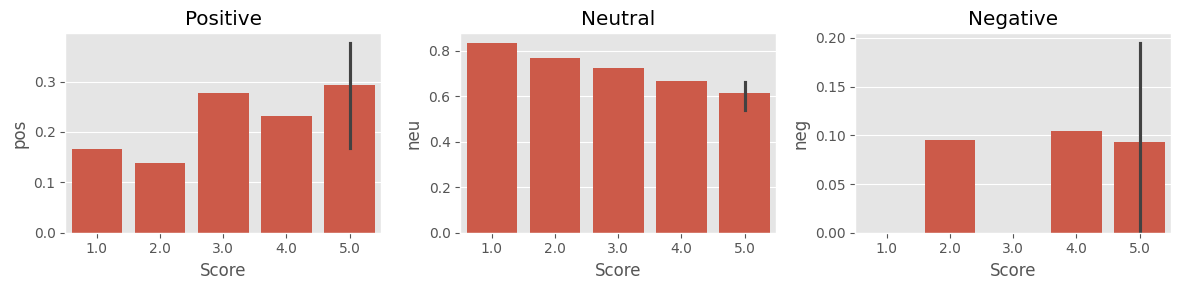

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


**STEP 8:Visualization of Sentiment Distribution**

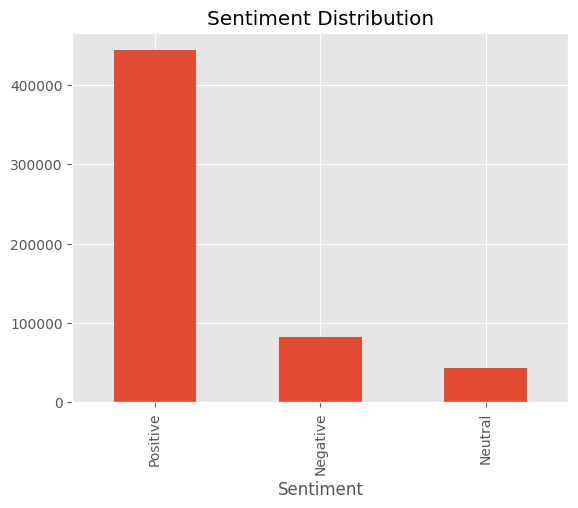

In [33]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.show()


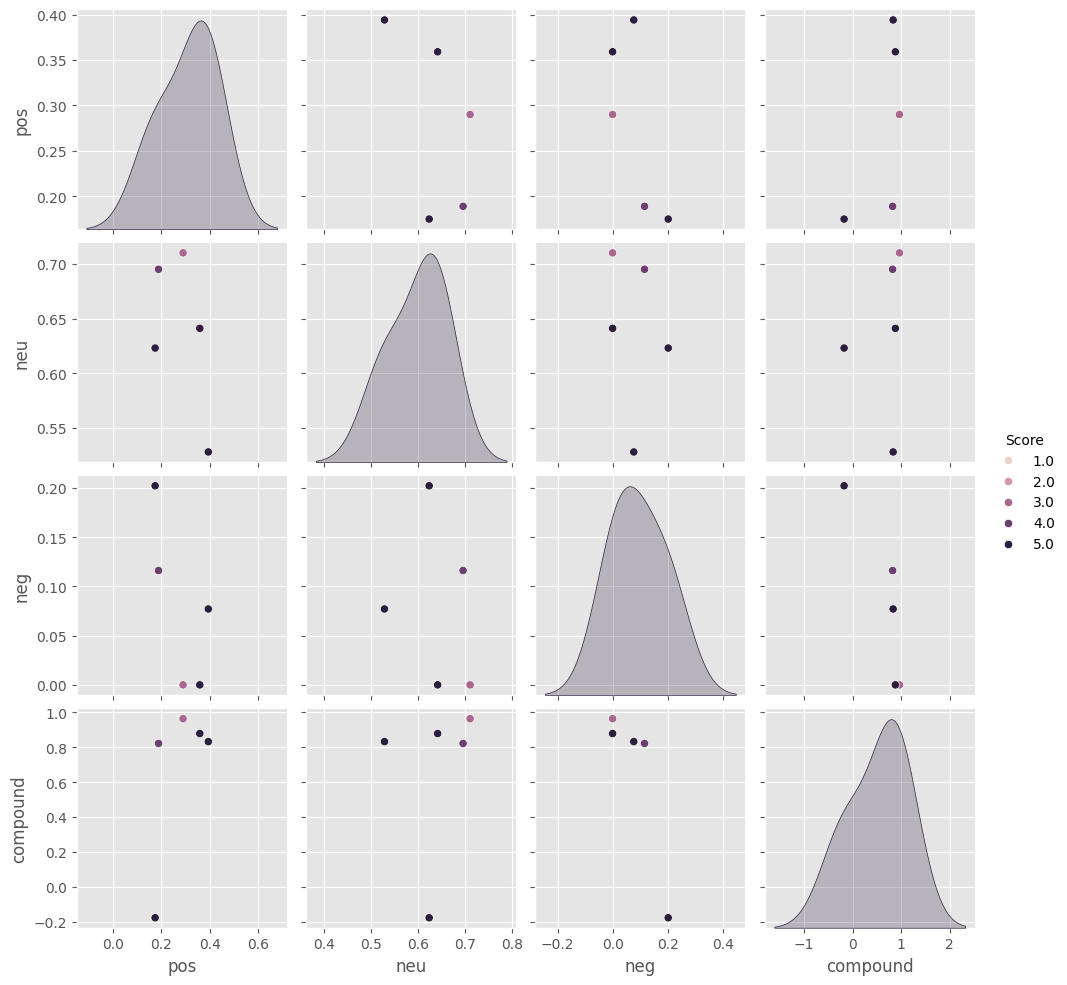

In [77]:
sample_df = df[['pos','neu','neg','compound','Score']].sample(3000)
sns.pairplot(sample_df, hue='Score')
plt.show()


**STEP 9: Converting Text into Numerical Features (Vectorization)**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['Sentiment']


**STEPS 10: Splitting Data into Training and Testing Sets**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**STEP 11:**

### **Model 1-Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8677379915736514
              precision    recall  f1-score   support

    Negative       0.73      0.68      0.71     16181
     Neutral       0.51      0.18      0.27      8485
    Positive       0.90      0.97      0.93     89025

    accuracy                           0.87    113691
   macro avg       0.71      0.61      0.64    113691
weighted avg       0.85      0.87      0.85    113691



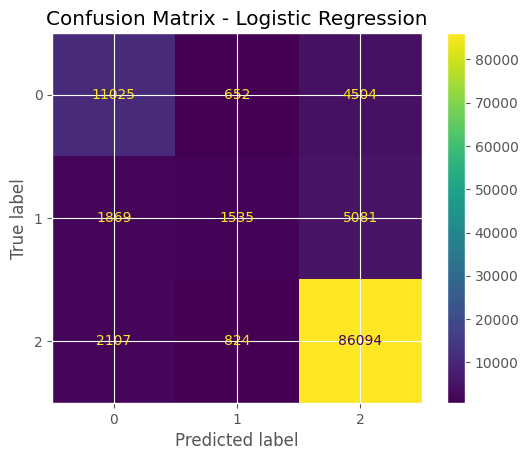

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### **Model-2: Naive Bayes**

In [38]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_acc)
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.818613610576035
              precision    recall  f1-score   support

    Negative       0.84      0.27      0.41     16181
     Neutral       0.44      0.00      0.00      8485
    Positive       0.82      1.00      0.90     89025

    accuracy                           0.82    113691
   macro avg       0.70      0.42      0.44    113691
weighted avg       0.79      0.82      0.76    113691



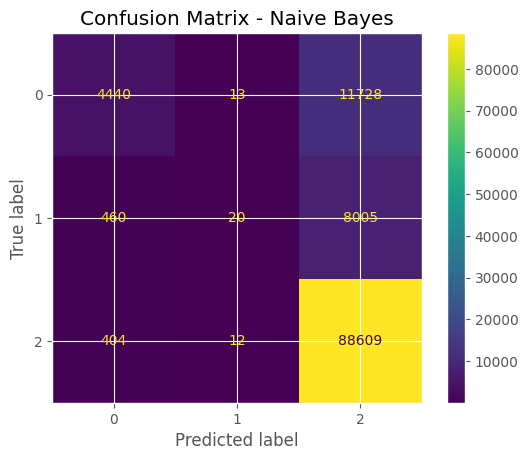

In [39]:
cm_nb = confusion_matrix(y_test, nb_pred)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


**STEP 13: Comparision of Models**

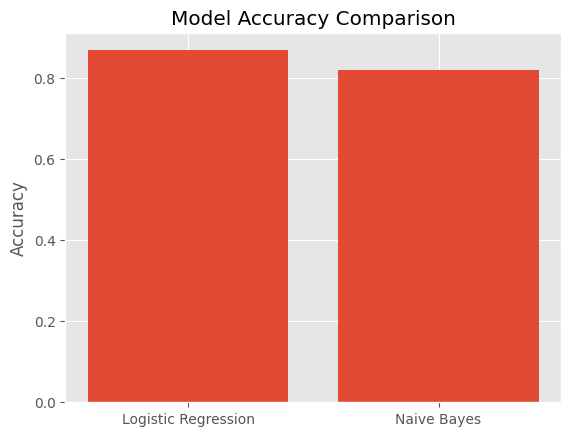

In [40]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [lr_acc, nb_acc]

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [41]:
def predict_sentiment(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = lr_model.predict(vector)
    return prediction[0]

print(predict_sentiment("I really love this product"))
print(predict_sentiment("This is very bad and disappointing"))


Positive
Negative


## **CONCLUSION :**

This project shows how raw text, which looks unstructured and confusing at first, can be transformed into meaningful insights using NLP techniques 🔍.
 Watching reviews turn into sentiment scores and visual graphs makes it clear how machines can “understand” human opinions 🤖💬.

Overall, this work highlights that sentiment analysis is not just a technical concept, but a practical tool that helps businesses, researchers, and developers understand people’s thoughts in a smarter way 📈.

# -----------   THE END  -----------